In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Loading Training set 
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
# Loading Test set
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
# Importing the best tuned Random Forest Classifier, as it is the model of choice
import joblib
rf = joblib.load('Rand_Forest.joblib')

In [5]:
# Making the predictions on the Test Set using the tuned Random Forest Classifier
y_preds = rf.predict_proba(X_test)[:,1]

### For the Ultimate, it is very important that the model must have high Precision & low FPR, in order for them to better tailor their marketing campaigns towards the existing customers. Hence we need to find the best threshold probability from the roc curve, above which the RF Classifier should mark an observation as belonging to class 1 (Active Customer for atleast next 30 days).

In [6]:
from sklearn.metrics import roc_curve

In [7]:
# Calculating False Positive Rate(fpr), True Positive Rate(tpr) & Prob Threshold values from sklearn's roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

In [8]:
# Finding the best threshold probability
optimal_idx = np.argmax((tpr - fpr))# Optimal threshold is one where diff between tpr & fpr is max.
optimal_threshold = thresholds[optimal_idx]
print("The optimum probability threshold value that gives best model recall viz a viz fpr is: ",optimal_threshold)

The optimum probability threshold value that gives best model recall viz a viz fpr is:  0.5311946262021531


In [9]:
# Defining the function for plotting the roc_auc curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, color='orange', label='Random forest ROC curve')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', Label='Random Guessing ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for the tuned Random Forest Classifier')
    plt.legend()
    plt.show()

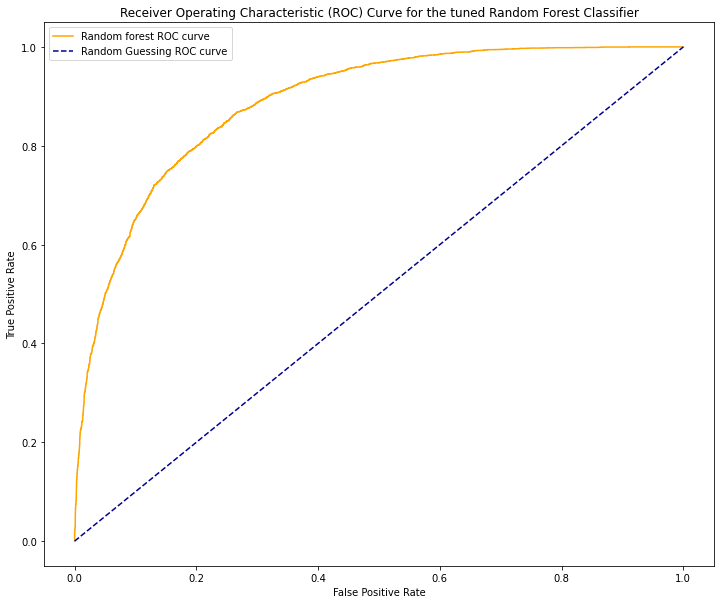

In [10]:
# Plotting the roc curve
plot_roc_curve(fpr, tpr)

In [11]:
# Importing the Sklearn's roc_auc_score module
from sklearn.metrics import roc_auc_score

In [12]:
print('The area under the Random forest classifier roc curve is: ',roc_auc_score(y_test, y_preds))

The area under the Random forest classifier roc curve is:  0.887408560683394


In [13]:
print('The value of model recall corresponding to optimal probability threshold is: ',tpr[optimal_idx])

The value of model recall corresponding to optimal probability threshold is:  0.8678542940707259


In [14]:
print('The value of model FPR corresponding to optimal probability threshold is: ',fpr[optimal_idx])

The value of model FPR corresponding to optimal probability threshold is:  0.2663888443660843


### The above  calculated (fpr, tpr) point, with coordinates (0.2663888443660843, 0.8678542940707259) , corresponding to the optimal probability threshold can be clearly seen on the above roc plot. Thus in order to maximize recall viz. a viz. FPR , any test observation with conditional prob (outputted by RF classifier) > 0.5311946262021531 , should be classified as belonging to class 1(Active Customer for atleast next 30 days).